In [2]:
#base
import pandas as pd
import numpy as np
import os
import time
from contextlib import contextmanager
import sys
import joblib

#plots
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.inspection import PartialDependenceDisplay
from scipy.stats import spearmanr
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,GridSearchCV
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

#train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler

#models
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,roc_auc_score,precision_score,accuracy_score,recall_score,f1_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
file_start = time.time()

In [4]:
data = pd.read_csv("loan_data.csv")

In [5]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [8]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [9]:
#extract categorical columns
cat_columns = ['person_gender', 'person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

In [10]:
#numerical_columns
num_columns = ['person_age', 'person_income','person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length','credit_score']

In [11]:
#convert categorical columns
for col in cat_columns:
    data[col] = data[col].astype('category')

# DATA PRE-PROCESSING

- handle missing values ifany
- check for duplicates
- reduce categories ifnot enough data
- encode categorical data
- Handle outliers

In [12]:
data1 = data.copy()

**1. Missing Values Check**

In [13]:
#check for missing values
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

**2. Duplicates check**

In [14]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [person_age, person_gender, person_education, person_income, person_emp_exp, person_home_ownership, loan_amnt, loan_intent, loan_int_rate, loan_percent_income, cb_person_cred_hist_length, credit_score, previous_loan_defaults_on_file, loan_status]
Index: []


**NUMERICAL DATA HANDLING - Outlier handling**

In [15]:
def detect_outliers_iqr(series, k=1.5):
    """
    Return a boolean mask (True = outlier) for a pandas Series using the IQR method.
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return (series < lower_bound) | (series > upper_bound)

num_cols = ["person_income", "loan_amnt", "loan_percent_income", "credit_score", ...]
outlier_masks = {}
for col in num_columns:
    mask = detect_outliers_iqr(data1[col].dropna(), k=1.5)
    outlier_count = mask.sum()
    pct = outlier_count / data1.shape[0]
    print(f"{col}: {outlier_count} outliers ({pct:.2%} of rows)")
    outlier_masks[col] = mask


person_age: 2188 outliers (4.86% of rows)
person_income: 2218 outliers (4.93% of rows)
person_emp_exp: 1724 outliers (3.83% of rows)
loan_amnt: 2348 outliers (5.22% of rows)
loan_int_rate: 124 outliers (0.28% of rows)
loan_percent_income: 744 outliers (1.65% of rows)
cb_person_cred_hist_length: 1366 outliers (3.04% of rows)
credit_score: 467 outliers (1.04% of rows)


In [16]:
#Variance Inflation Factor for correlation
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [17]:
calc_vif(data1[num_columns])

,variables,vif
0,person_age,156.228180
1,person_income,2.871934
2,person_emp_exp,11.534092
3,loan_amnt,6.735278
4,loan_int_rate,14.489486
5,loan_percent_income,7.161562
6,cb_person_cred_hist_length,12.089290
7,credit_score,91.349883


In [18]:
#cap high age values
data1['person_age'] = np.where(data1['person_age']>100,100,data1['person_age'])

In [19]:
#bin age to categorical
data1["age_group"] = pd.cut(data1["person_age"], bins=[18,30,100], labels=["18–30","31+"])

In [20]:
data1["age_group"].value_counts(normalize=True)

age_group
18–30    0.764422
31+      0.235578
Name: proportion, dtype: float64

In [21]:
#drop age column and add age_group to categorical columns list
data1 = data1.drop('person_age',axis =1)
cat_columns = cat_columns + ['age_group']
num_columns.remove('person_age')

In [22]:
#check person experience
data1['person_emp_exp'].describe()

count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64

In [23]:
# Calculate the median of the 'person_emp_exp' column
median_emp_exp = data1['person_emp_exp'].median()

# Replace values in 'person_emp_exp' greater than 55 with the median value
data1['person_emp_exp'] = data1['person_emp_exp'].apply(lambda x: median_emp_exp if x > 55 else x)

- It's uncommon for individuals to have over 55 years of work experience, especially considering most people start their careers between 18-25 years old.
- Values above 55 years are likely data entry errors or anomalies that do not represent the typical applicant profile.

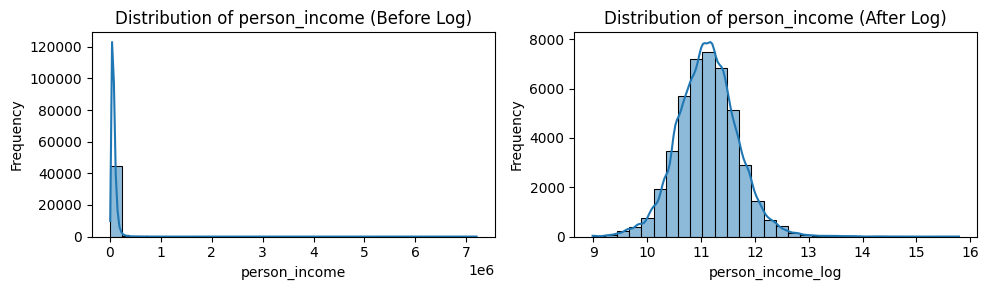

In [24]:
# Plot the distribution of 'person_income' before the log transformation
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(data1['person_income'], kde=True, bins=30)
plt.title('Distribution of person_income (Before Log)')
plt.xlabel('person_income')
plt.ylabel('Frequency')

# Apply the log transformation
data1['person_income_log'] = np.log(data1['person_income'] + 1)

# Plot the distribution of 'person_income' after the log transformation
plt.subplot(1, 2, 2)
sns.histplot(data1['person_income_log'], kde=True, bins=30)
plt.title('Distribution of person_income (After Log)')
plt.xlabel('person_income_log')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
data1.head()

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,age_group,person_income_log
0,female,Master,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,18–30,11.183713
1,female,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,18–30,9.415971
2,female,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,18–30,9.428592
3,female,Bachelor,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,18–30,11.286702
4,male,Master,66135.0,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,18–30,11.099469


In [26]:
calc_vif(data1[num_columns])

,variables,vif
0,person_income,2.785151
1,person_emp_exp,6.135252
2,loan_amnt,6.741964
3,loan_int_rate,14.062497
4,loan_percent_income,7.151129
5,cb_person_cred_hist_length,11.037145
6,credit_score,18.437860


<Axes: >

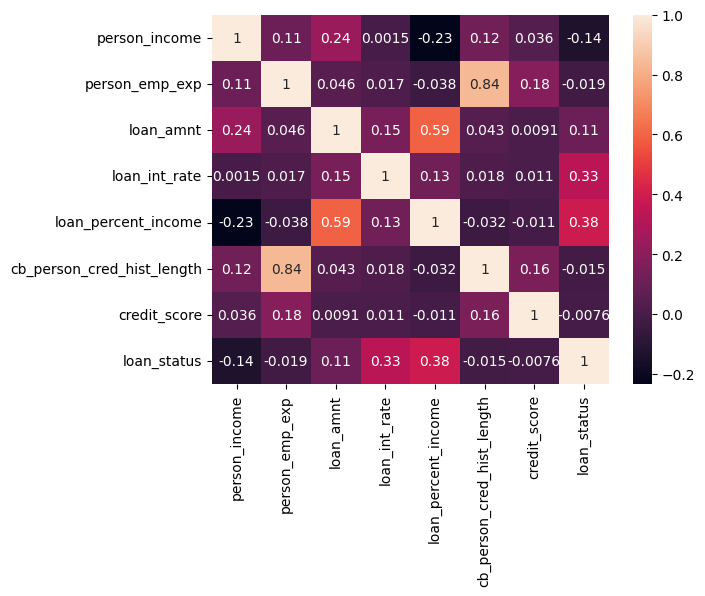

In [27]:
corr_df = data1[num_columns + ["loan_status"]]
sns.heatmap(corr_df.corr(),annot=True)

**3. Categorical data handling**

In [28]:
#check for high cardinality
data1[cat_columns].nunique()

person_gender                     2
person_education                  5
person_home_ownership             4
loan_intent                       6
previous_loan_defaults_on_file    2
age_group                         2
dtype: int64

In [29]:
print(data1['person_education'].value_counts(normalize=True))

person_education
Bachelor       0.297756
Associate      0.267289
High School    0.266044
Master         0.155111
Doctorate      0.013800
Name: proportion, dtype: float64


In [30]:
print(data1['person_home_ownership'].value_counts(normalize=True))

person_home_ownership
RENT        0.520956
MORTGAGE    0.410867
OWN         0.065578
OTHER       0.002600
Name: proportion, dtype: float64


In [31]:
print(data1['loan_intent'].value_counts(normalize=True))

loan_intent
EDUCATION            0.203400
MEDICAL              0.189956
VENTURE              0.173756
PERSONAL             0.167822
DEBTCONSOLIDATION    0.158778
HOMEIMPROVEMENT      0.106289
Name: proportion, dtype: float64


In [32]:
#Combine masters and doctorate to higher education
data1['person_education'] = np.where(data1['person_education'].isin(['Master','Doctorate']),'Higher education',data1['person_education'])

In [33]:
#check gender columns
print(data['person_gender'].unique())

['female', 'male']
Categories (2, object): ['female', 'male']


In [34]:
data1.columns

Index(['person_gender', 'person_education', 'person_income', 'person_emp_exp',
       'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status', 'age_group',
       'person_income_log'],
      dtype='object')

In [35]:
#use label encoding for columns with 2 categories and dummy for those with more

#one  hot encode columns with more than 2 categories
data1 = pd.get_dummies(data1, columns=['person_education','person_home_ownership','loan_intent'], drop_first=False)

# # Convert all the columns with prefix to 0/1 instead of False/True
dumm_cols = [col for col in data1.columns if col.startswith(('person_education','person_home_ownership','loan_intent'))]
data1[dumm_cols] = data1[dumm_cols].astype(int)

le = LabelEncoder()
for col in [col for col in cat_columns if col not in ['person_education','person_home_ownership','loan_intent']]:
    data1[col] = le.fit_transform(data1[col])
    

In [36]:
data1.head()

,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,71948.0,0.0,35000.0,16.02,0.49,3.0,561,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,12282.0,0.0,1000.0,11.14,0.08,2.0,504,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,12438.0,3.0,5500.0,12.87,0.44,3.0,635,0,1,...,1,0,0,0,0,0,0,1,0,0
3,0,79753.0,0.0,35000.0,15.23,0.44,2.0,675,0,1,...,0,0,0,1,0,0,0,1,0,0
4,1,66135.0,1.0,35000.0,14.27,0.53,4.0,586,0,1,...,0,0,0,1,0,0,0,1,0,0


## TRAIN TEST SPLIT

In [37]:
data1.head(3)

,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,71948.0,0.0,35000.0,16.02,0.49,3.0,561,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,12282.0,0.0,1000.0,11.14,0.08,2.0,504,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,12438.0,3.0,5500.0,12.87,0.44,3.0,635,0,1,...,1,0,0,0,0,0,0,1,0,0


In [38]:
data1.shape

(45000, 26)

In [39]:
data1['loan_status'].unique()

array([1, 0], dtype=int64)

In [40]:
data1.columns

Index(['person_gender', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status',
       'age_group', 'person_income_log', 'person_education_Associate',
       'person_education_Bachelor', 'person_education_High School',
       'person_education_Higher education', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [41]:
target_col = ['loan_status']

In [42]:
num_cols1 = ['person_income_log', 'person_emp_exp',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score']

In [43]:
#'previous_loan_defaults_on_file' -- removing this column as it is highly correlated to output
cat_cols1 = ['person_gender','age_group',
       'person_education_Associate', 'person_education_Bachelor',
       'person_education_High School',
       'person_education_Higher education', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']

In [44]:
print("numerical columns", len(num_cols1))
print("categorical columns", len(cat_cols1))

numerical columns 7
categorical columns 16


In [45]:
input_features = cat_cols1 + num_cols1
x = data1[input_features]
y = data1['loan_status']

In [46]:
print(input_features)

['person_gender', 'age_group', 'person_education_Associate', 'person_education_Bachelor', 'person_education_High School', 'person_education_Higher education', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'person_income_log', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


In [47]:
data1.to_csv('preprocessed_data.csv',index=False)

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31500, 23) (13500, 23) (31500,) (13500,)


**RESAMPLE THE DATA**

In [47]:
#under = RandomUnderSampler(sampling_strategy=0.4285, random_state=200)
#over = RandomOverSampler(sampling_strategy=0.4285, random_state=200)
sm = SMOTE(random_state = 200)
x_train,y_train = sm.fit_resample(x_train,y_train)

In [48]:
#CREATE PATH FOR SAVING FILES
model_results = "my_projects/loan_approval" #chnage to own file path
cur_user = "SMOTE_STANDARD_" + os.getlogin().split('.')[0]
exp_code = str(round(time.time() * 1000)) + cur_user
results_path = os.path.join(model_results, exp_code)+"/"

try:
    os.mkdir(results_path)
except OSError as error:
    pass

In [49]:
x_train.to_csv(results_path + "x_train.csv",index=False)
x_test.to_csv(results_path + "x_test.csv",index=False)
y_train.to_csv(results_path + "y_train.csv",index=False)
y_test.to_csv(results_path + "y_test.csv",index=False)

In [51]:
scale = StandardScaler()

In [52]:
lasso = SelectFromModel(Lasso(alpha=0.01))

## MODELLING

In [53]:
@contextmanager
def redirect_stdout_to_file(file_path):
    original_stdout = sys.stdout
    # Open in UTF-8 with replacement of unencodable characters
    sys.stdout = open(file_path, "w", encoding="utf-8", errors="replace")
    try:
        yield
    finally:
        sys.stdout.close()
        sys.stdout = original_stdout

In [57]:
def evaluate_model(model_name,pipeline):
    #fit the pipeline
    pipeline.fit(x_train,y_train)
    
    selected_features = x_train.columns[pipeline.named_steps['feature_selection'].get_support()]
    print("Selected Features:", selected_features.tolist())
    
    preds = np.delete(pipeline.predict_proba(x_test),0,1)
    
    print(f"-----{model_name} results without thresholding-------------------")
    print(classification_report(y_test,[1 if x>0.5 else 0 for x in preds]))
    print(confusion_matrix(y_test,[1 if x>0.5 else 0 for x in preds]))

    print(f"------------------------------------------------------------------")
    print(f"-----{model_name} results with thresholding-----------------------")
    precision1, recall1, thresholds1 = precision_recall_curve(
        y_test, preds)
    # convert to f score
    numerator = 2 * precision1 * recall1
    denominator = precision1 + recall1
    fscore = np.divide(numerator, denominator, out=np.zeros_like(
        denominator), where=(denominator != 0))
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds1[ix], fscore[ix]))
    print(classification_report(
    y_test, [1 if x >= thresholds1[ix] else 0 for x in preds]))
    print(confusion_matrix(
        y_test, [1 if x >= thresholds1[ix] else 0 for x in preds]))
        
    ##get scores required using threshold limit
    thresh_orig = thresholds1[ix]
    cm = confusion_matrix(y_test, [1 if x >= thresholds1[ix] else 0 for x in preds])
    true_neg_orig, false_pos_orig, false_neg_orig, true_pos_orig = cm.ravel()
    roc_auc_orig = roc_auc_score(y_test, [1 if x >= thresholds1[ix] else 0 for x in preds])
    f1_orig = f1_score(y_test, [1 if x >= thresholds1[ix] else 0 for x in preds])
    precision_orig = precision_score(y_test, [1 if x >= thresholds1[ix] else 0 for x in preds])
    recall_orig = recall_score(y_test, [1 if x >= thresholds1[ix] else 0 for x in preds])
    accuracy_orig = accuracy_score(y_test, [1 if x >= thresholds1[ix] else 0 for x in preds])
    AUROC_orig = roc_auc_score(
    y_test, [1 if x >= thresholds1[ix] else 0 for x in preds])
    gini_score_orig =  2*AUROC_orig-1
    
    return preds,gini_score_orig,roc_auc_orig,precision_orig,recall_orig,f1_orig,accuracy_orig,true_neg_orig, false_pos_orig, false_neg_orig, true_pos_orig,thresh_orig

In [58]:
def evaluate_model_with_tuning(model_name,pipeline,hyperparameters,x_train,y_train,x_test,y_test):
    print(f"---------------------AFTER PARAMETER TUNING-------------------------------")
    print(f"--------------------------------------------------------------------------")

    search_model = RandomizedSearchCV(pipeline,hyperparameters,cv=5,n_iter=10, scoring='f1', random_state=42)
    search_model.fit(x_train,y_train)
    
    print(search_model.best_estimator_)
    
    best_model = search_model.best_estimator_
    
    print("Best params:", search_model.best_params_)
    
    selected_features = x_train.columns[search_model.best_estimator_.named_steps['feature_selection'].get_support()]
    print("Selected Features:", selected_features.tolist())

    #SAVE MODEL
    joblib.dump(search_model, results_path + exp_code + "_" + model_name + ".pkl")
    

    #get predictions of tuned model
    predictions = np.delete(search_model.predict_proba(x_test),0,1)
    print(f"-----{model_name} results without thresholding-----------------------")
    print(classification_report(y_test,[1 if x>0.5 else 0 for x in predictions]))
    print(confusion_matrix(y_test,[1 if x>0.5 else 0 for x in predictions]))

    print(f"--------------------------------------------------------------------")
    print(f"-----{model_name} results with thresholding--------------------------")
    precision1, recall1, thresholds1 = precision_recall_curve(
        y_test, predictions)
    
    numerator = 2 * precision1 * recall1
    denominator = precision1 + recall1
    fscore = np.divide(numerator, denominator, out=np.zeros_like(
        denominator), where=(denominator != 0))
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' %(thresholds1[ix], fscore[ix]))
    print(classification_report(
    y_test, [1 if x >= thresholds1[ix] else 0 for x in predictions]))
    print(confusion_matrix(
        y_test, [1 if x >= thresholds1[ix] else 0 for x in predictions]))

    ##get scores required using threshold limit
    thresh = thresholds1[ix]
    cm = confusion_matrix(y_test, [1 if x >= thresholds1[ix] else 0 for x in predictions])
    true_neg, false_pos, false_neg, true_pos = cm.ravel()
    roc_auc = roc_auc_score(y_test, [1 if x >= thresholds1[ix] else 0 for x in predictions])
    f1 = f1_score(y_test, [1 if x >= thresholds1[ix] else 0 for x in predictions])
    precision = precision_score(y_test, [1 if x >= thresholds1[ix] else 0 for x in predictions])
    recall = recall_score(y_test, [1 if x >= thresholds1[ix] else 0 for x in predictions])
    accuracy = accuracy_score(y_test, [1 if x >= thresholds1[ix] else 0 for x in predictions])
    
    #Get gini score
    AUROC = roc_auc_score(
    y_test, [1 if x >= thresholds1[ix] else 0 for x in predictions])
    gini_score =  2*AUROC-1
    print ("GINI SCORE", gini_score)
    return best_model,selected_features,predictions,gini_score,roc_auc,precision,recall,f1,accuracy,true_neg, false_pos, false_neg, true_pos,thresh
    

In [59]:
#defining thresholds
def cut_off(scale,model_name,model,hyperparameters):
    start = time.time()
    print("results_path:", results_path)
    file_path = results_path+exp_code+"_" + model_name + "_LOGS.txt"
    
    with redirect_stdout_to_file(file_path):
        print(f"-------------------------------------------------------------------------")
        
        pipeline = Pipeline([
            ('scaler', scale),
            ('feature_selection', lasso),
            ("classifier",model)
        ])
        
        #evaluate model with default parameters
        preds,gini_score_orig,roc_auc_orig,precision_orig,recall_orig,f1_orig,accuracy_orig,true_neg_orig, false_pos_orig, false_neg_orig, true_pos_orig,thresh_orig = evaluate_model(model_name,pipeline)
        
        #Evaluate hyperparameter tuned model
        best_model,selected_features,predictions,gini_score,roc_auc,precision,recall,f1,accuracy,true_neg, false_pos, false_neg, true_pos,thresh = evaluate_model_with_tuning(model_name,pipeline,hyperparameters,
        x_train,y_train,x_test,y_test)
        
        before_tuning = pd.DataFrame({'MODEL' : [model_name],
                          'THRESHOLD':thresh_orig,
                          'GINI SCORE':gini_score_orig,
                          'ROC_AUC':roc_auc_orig,
                          'PRECISION':precision_orig,
                          'RECALL':recall_orig,
                          'F1_SCORE':f1_orig,
                        'ACCURACY':accuracy_orig,
                        'TP':true_pos_orig,
                         'FP':false_pos_orig,
                         'TN':true_neg_orig,
                         'FN':false_neg_orig})
        after_tuning = pd.DataFrame({'MODEL' : [model_name],
                        'THRESHOLD':thresh,
                          'GINI SCORE':gini_score,
                          'ROC_AUC':roc_auc,
                          'PRECISION':precision,
                          'RECALL':recall,
                          'F1_SCORE':f1,
                        'ACCURACY':accuracy,
                        'TP':true_pos,
                         'FP':false_pos,
                         'TN':true_neg,
                         'FN':false_neg})
    end = time.time()
    print("TIME TAKEN",end-start)
    return preds,predictions,before_tuning,after_tuning

**1. LOGISTIC REGRESSION**

In [60]:
model1 = LogisticRegression(random_state=42)

In [61]:
hyperparameters1 = {
    "classifier__penalty":    ["l1", "l2"],
    "classifier__C":          [0.01, 0.1, 1, 10, 100],
    "classifier__solver":     ["liblinear", "saga"],       # both support l1 & l2
    "classifier__class_weight": ["balanced", None]
}

In [62]:
lg_preds,lg_predictions,lg_before_tuning,lg_after_tuning = cut_off(scale = scale,
                                                             model_name = 'Logistic Regression',
                                                                   model=model1,hyperparameters=hyperparameters1)

results_path: C:/Users/user/Desktop/analytics/my_projects/loan_approval\1749649249889SMOTE_STANDARD_user/
TIME TAKEN 96.02298974990845


In [63]:
lg_before_tuning

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,Logistic Regression,0.326876,0.555493,0.777747,0.574681,0.705022,0.633214,0.818074,2120,1569,8924,887


In [64]:
lg_after_tuning

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,Logistic Regression,0.327261,0.555542,0.777771,0.57519,0.704689,0.633388,0.818296,2119,1565,8928,888


**2.RANDOM FOREST**

In [65]:
model2 = RandomForestClassifier(random_state=42)

In [66]:
# Declare hyperparameters to tune
hyperparameters2 = {'classifier__max_features' : ['log2'],
                  'classifier__max_depth': [None, 5, 3, 1],
                   'classifier__n_estimators':list(np.arange(50,500,100))
                   }

In [67]:
rf_preds,rf_predictions,rf_before_tuning,rf_after_tuning = cut_off(scale = scale,
                                                             model_name = 'Random Forest Classifier',model=model2,hyperparameters=hyperparameters2)

results_path: C:/Users/user/Desktop/analytics/my_projects/loan_approval\1749649249889SMOTE_STANDARD_user/
TIME TAKEN 347.5590925216675


In [68]:
rf_before_tuning

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,Random Forest Classifier,0.52,0.646098,0.823049,0.843403,0.682408,0.754412,0.901037,2052,381,10112,955


In [69]:
rf_after_tuning

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,Random Forest Classifier,0.506667,0.646662,0.823331,0.836378,0.685068,0.753199,0.9,2060,403,10090,947


**3.DECISION TREE**

In [70]:
model3 = DecisionTreeClassifier(random_state=42,ccp_alpha=0.002)

In [71]:
hyperparameters3 = {'classifier__max_depth': [None,1,2,3,4,5,6,7,8],
                   'classifier__min_samples_leaf':[1, 10, 25],
                   "classifier__ccp_alpha": np.logspace(-4, -1, 10)}

In [72]:
dt_preds,dt_predictions,dt_before_tuning,dt_after_tuning = cut_off(scale = scale,model_name = 'Decision Tree',
                                                             model=model3,hyperparameters=hyperparameters3)

results_path: C:/Users/user/Desktop/analytics/my_projects/loan_approval\1749649249889SMOTE_STANDARD_user/
TIME TAKEN 20.46474552154541


In [73]:
dt_before_tuning

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,Decision Tree,0.819482,0.613771,0.806886,0.812834,0.657133,0.726738,0.889926,1976,455,10038,1031


In [74]:
dt_after_tuning

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,Decision Tree,0.546988,0.635453,0.817726,0.787452,0.688726,0.734788,0.889259,2071,559,9934,936


**4. GRADIENT BOOSTING**

In [75]:
model4 = GradientBoostingClassifier(random_state = 42)

In [76]:
hyperparameters4 = {'classifier__max_depth': [None, 5, 3, 1],
                   'classifier__n_estimators':list(np.arange(50,800,150)),
                    'classifier__learning_rate' : [0.01, 0.05, 0.1, 0.2,0.3]
                   }

In [77]:
gbc_preds,gbc_predictions,gbc_before_tuning,gbc_after_tuning = cut_off(scale = scale,model_name = 'Gradient Boosting',
                                                             model=model4,hyperparameters=hyperparameters4)

results_path: C:/Users/user/Desktop/analytics/my_projects/loan_approval\1749649249889SMOTE_STANDARD_user/
TIME TAKEN 2658.3507211208344


In [78]:
gbc_before_tuning

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,Gradient Boosting,0.519755,0.635756,0.817878,0.859101,0.66711,0.75103,0.901481,2006,329,10164,1001


In [79]:
gbc_after_tuning

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,Gradient Boosting,0.445562,0.672189,0.836095,0.859052,0.705354,0.774653,0.908593,2121,348,10145,886


**5. KNN**

In [80]:
model5 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [81]:
hyperparameters5={'classifier__n_neighbors': np.arange(2, 30, 1),
                "classifier__metric": ["minkowski", "chebyshev", "cosine"]}

In [82]:
knn_preds,knn_predictions,knn_before_tuning,knn_after_tuning = cut_off(scale = scale,model_name = 'KNN Classifier',
                                                             model=model5,hyperparameters=hyperparameters5)

results_path: C:/Users/user/Desktop/analytics/my_projects/loan_approval\1749649249889SMOTE_STANDARD_user/
TIME TAKEN 486.0566635131836


In [83]:
knn_before_tuning

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,KNN Classifier,0.6,0.527549,0.763775,0.797297,0.569006,0.664079,0.871778,1711,435,10058,1296


In [84]:
knn_after_tuning

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,KNN Classifier,0.5,0.56274,0.78137,0.668134,0.656136,0.662081,0.850815,1973,980,9513,1034


**6. NAIVE BAYES**

In [85]:
model6 = GaussianNB()

In [86]:
hyperparameters6 = {
    "classifier__var_smoothing": np.logspace(-12, -2, 11)  # 1e-12 … 1e-2
}

In [87]:
nb_preds,knn_predictions,nb_before_tuning,nb_after_tuning = cut_off(scale = scale,model_name = 'Naive Bayes Classifier',
                                                             model=model6,hyperparameters=hyperparameters6)

results_path: C:/Users/user/Desktop/analytics/my_projects/loan_approval\1749649249889SMOTE_STANDARD_user/
TIME TAKEN 14.85905122756958


In [88]:
nb_before_tuning

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,Naive Bayes Classifier,0.294611,0.41334,0.70667,0.455136,0.629199,0.528197,0.74963,1892,2265,8228,1115


In [89]:
nb_after_tuning

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,Naive Bayes Classifier,0.305943,0.415285,0.707643,0.455111,0.632192,0.529232,0.749481,1901,2276,8217,1106


**COLLATE ALL SCORES**

In [90]:
scores_before_tuning = [rf_before_tuning,dt_before_tuning,lg_before_tuning,gbc_before_tuning,knn_before_tuning,nb_before_tuning]
finalscores = pd.concat(scores_before_tuning,axis=0)
finalscores.sort_values(by='F1_SCORE',ascending=False)

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,Random Forest Classifier,0.520000,0.646098,0.823049,0.843403,0.682408,0.754412,0.901037,2052,381,10112,955
0,Gradient Boosting,0.519755,0.635756,0.817878,0.859101,0.667110,0.751030,0.901481,2006,329,10164,1001
0,Decision Tree,0.819482,0.613771,0.806886,0.812834,0.657133,0.726738,0.889926,1976,455,10038,1031
0,KNN Classifier,0.600000,0.527549,0.763775,0.797297,0.569006,0.664079,0.871778,1711,435,10058,1296
0,Logistic Regression,0.326876,0.555493,0.777747,0.574681,0.705022,0.633214,0.818074,2120,1569,8924,887
0,Naive Bayes Classifier,0.294611,0.413340,0.706670,0.455136,0.629199,0.528197,0.749630,1892,2265,8228,1115


In [91]:
finalscores.to_csv(results_path+"final_scores_before_tuning.csv",index=False)

In [92]:
scores_after_tuning = [rf_after_tuning,dt_after_tuning,lg_after_tuning,gbc_after_tuning,knn_after_tuning,nb_after_tuning]
finalscores_tuned = pd.concat(scores_after_tuning,axis=0)
finalscores_tuned.sort_values(by='F1_SCORE',ascending=False)

,MODEL,THRESHOLD,GINI SCORE,ROC_AUC,PRECISION,RECALL,F1_SCORE,ACCURACY,TP,FP,TN,FN
0,Gradient Boosting,0.445562,0.672189,0.836095,0.859052,0.705354,0.774653,0.908593,2121,348,10145,886
0,Random Forest Classifier,0.506667,0.646662,0.823331,0.836378,0.685068,0.753199,0.900000,2060,403,10090,947
0,Decision Tree,0.546988,0.635453,0.817726,0.787452,0.688726,0.734788,0.889259,2071,559,9934,936
0,KNN Classifier,0.500000,0.562740,0.781370,0.668134,0.656136,0.662081,0.850815,1973,980,9513,1034
0,Logistic Regression,0.327261,0.555542,0.777771,0.575190,0.704689,0.633388,0.818296,2119,1565,8928,888
0,Naive Bayes Classifier,0.305943,0.415285,0.707643,0.455111,0.632192,0.529232,0.749481,1901,2276,8217,1106


In [93]:
finalscores_tuned.to_csv(results_path+"final_scores_after_tuning.csv",index=False)

In [94]:
file_end = time.time()

In [96]:
print("TOTAL RUNTIME", (file_end - file_start)/3600 , "Hour")

TOTAL RUNTIME 1.008800112605095 Hour
